# Customer Segmentation for E-commerce using RFM and K-Means

This project analyzes e-commerce customer behavior using the RFM (Recency, Frequency, Monetary) model and applies K-Means clustering to segment customers.

```markdown
## Importing the libraies
```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')

```markdown
## Data Loading and Preprocessing
```

In [4]:
# Load the dataset
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

```markdown
## Data Merging and Transformation
```

In [5]:
# Merge datasets
order_data = orders.merge(customers, on='customer_id')
order_data = order_data.merge(payments.groupby('order_id').payment_value.sum().reset_index(), on='order_id')
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

```markdown
## RFM Metrics Calculation
```

In [6]:
# RFM metrics
snapshot_date = order_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
rfm = order_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]

```markdown
## Scaling and Clustering
```

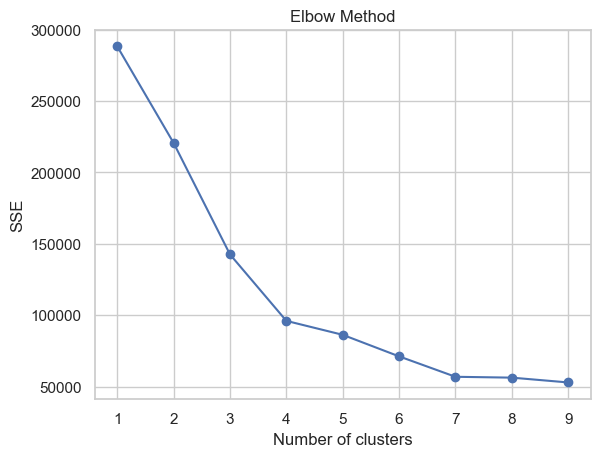

In [7]:
# Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Finding optimal clusters using Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

```markdown
### Final Customer Segmentation and Visualization
```

In [8]:
# Fit final model
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

```markdown
### Visualizing Clusters
```

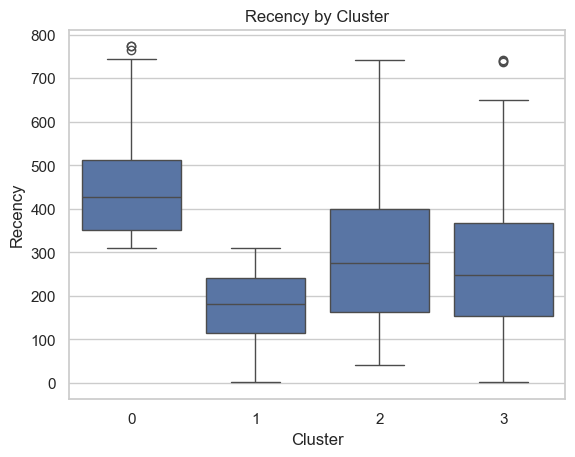

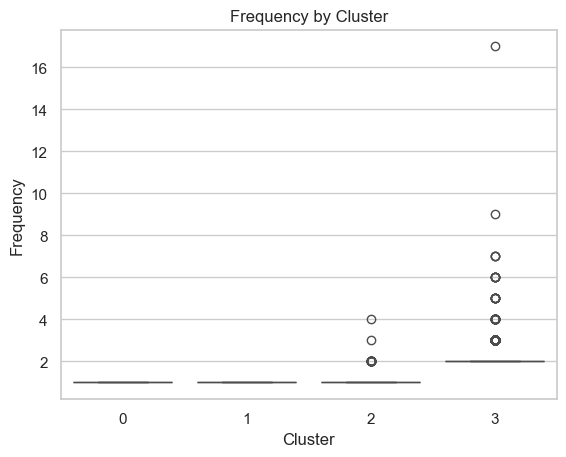

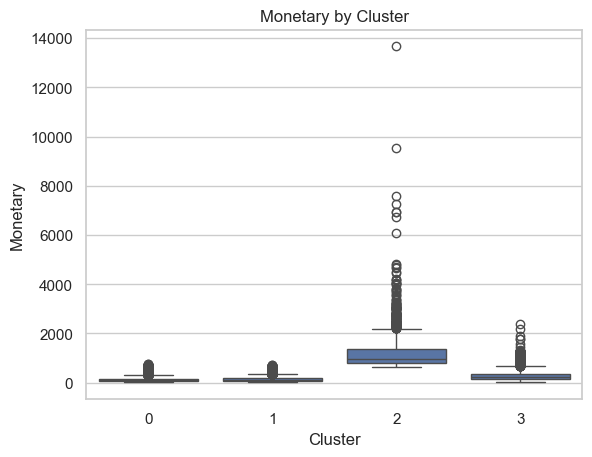

In [9]:
# Visualize clusters
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary by Cluster')
plt.show()

## Insights and Recommendations

- Cluster 0: High-value loyal customers. Offer them exclusive deals.
- Cluster 1: Recent one-time buyers. Consider retargeting campaigns.
- Cluster 2: Lapsed customers. Re-engage with promotions.
- Cluster 3: Frequent buyers with low spending. Upsell or bundle products.